# Multiple Linear Regression

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.artist'

In [19]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [20]:
df=pd.read_csv('Advertising.csv')

In [21]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

c:\Users\91878\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91878\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91878\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91878\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

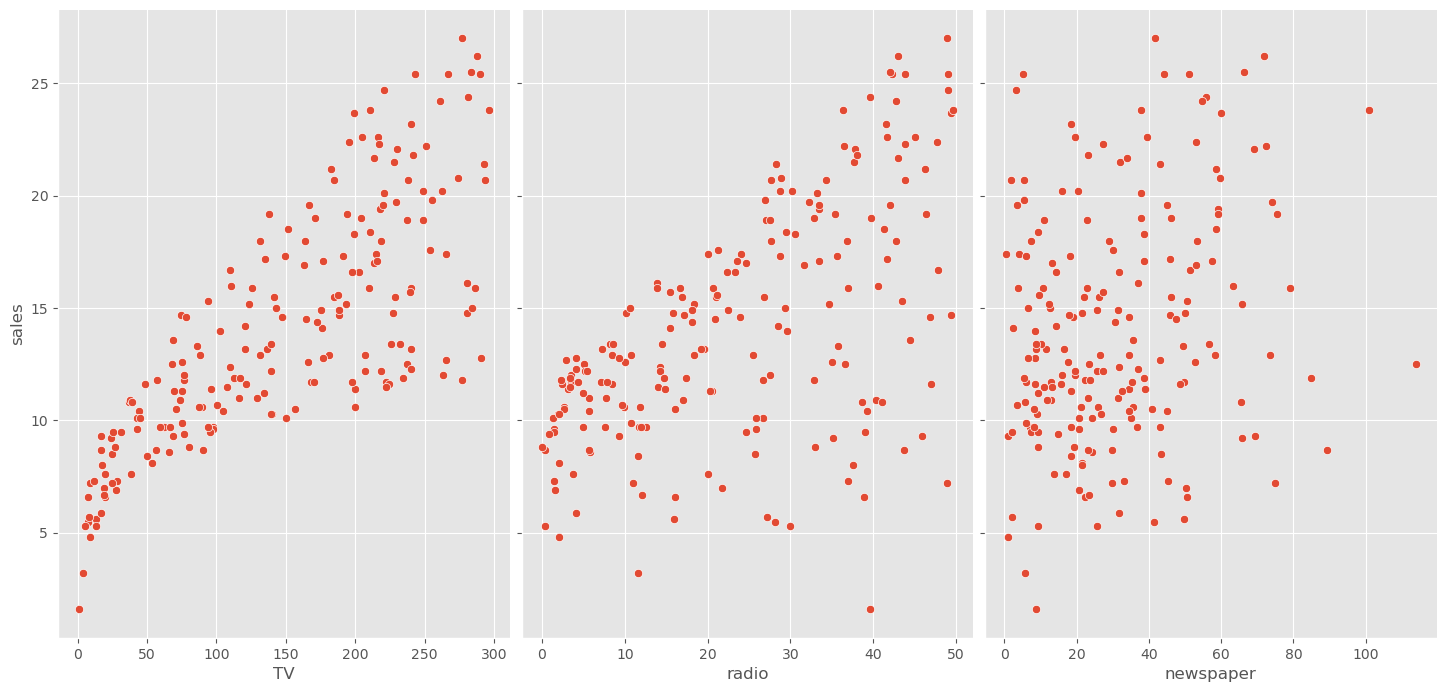

In [23]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [24]:
from sklearn.linear_model import LinearRegression
x=df.drop('sales',axis=1)
y=df['sales']
lm1=LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [25]:
list(zip(['TV','radio','newspaper'],lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820445),
 ('newspaper', -0.0010374930424763285)]

<Axes: >

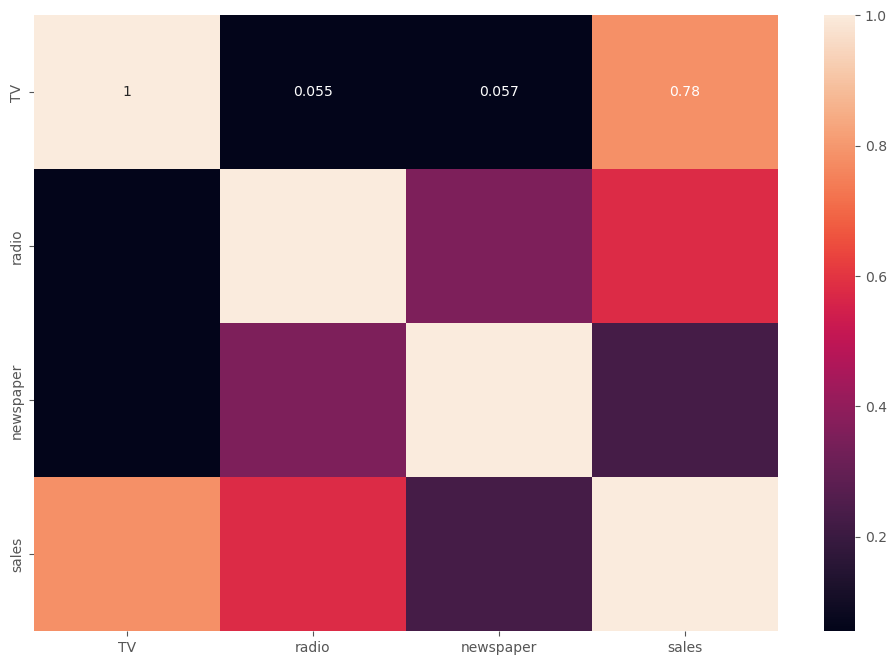

In [26]:
sns.heatmap(df.corr(),annot=True)

### Task 5: Feature Selection

In [27]:
from sklearn.metrics import r2_score
lm2=LinearRegression()
lm2.fit(x[['TV','radio']],y)
lm2_pred=lm2.predict(x[['TV','radio']])
print(r2_score(y,lm2_pred))

0.8971942610828957


In [28]:
lm3=LinearRegression()
lm3.fit(x[['TV','radio','newspaper']],y)
lm3_pred=lm3.predict(x[['TV','radio','newspaper']])
print(r2_score(y,lm3_pred))

0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df.drop('sales',axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm4=LinearRegression().fit(x_train,y_train)
lm4_pred=lm4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))

RMSE: 1.404651423032896
R*2: 0.9156213613792231


In [30]:
X=df.drop(['sales','newspaper'],axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

RMSE: 1.3879034699382888
R*2: 0.9176214942248907


In [32]:
from yellowbrick.regressor import PredictionError 
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.proof()

ModuleNotFoundError: No module named 'yellowbrick'

### Task 7: Interaction Effect (Synergy)

In [ ]:
df['interaction']=df['TV']*df['radio']
X=df[['TV','radio','interaction']]
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm6=LinearRegression().fit(x_train,y_train)
lm6_pred=lm6.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R*2:",r2_score(y_test,lm6_pred))

RMSE: 0.7011871137164326
R*2: 0.9789736814681261


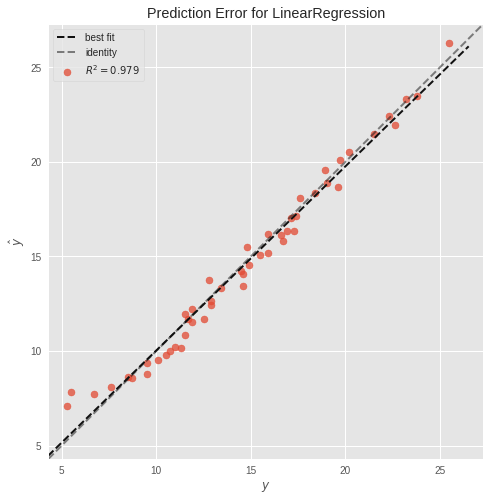

In [ ]:
v=PredictionError(lm6).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()